## Ridge Regression

1. Given	the	gradient	descent	algorithms	for	linear	regression	(discussed	in	Chapter	2	of	Module	2),	derive	weight update	steps	of	stochastic	gradient descent	 (SGD)	 as	 well	 as	 batch	 gradient	 descent	 (BGD)	 for	 linear	regression	 with	 L2	 regularisation	 norm.	 Show	 your	 work	 with	 enough	explanation	in	your	PDF	report;	you	should	provide	the	steps	of	SGD	and	BGD,	separately.	

Hint: Recall	that	for	linear	regression	we	defined	the	error	function	E	and	
set	its	derivation	to	zero.	For	this	assignment,	you	only	need	to	add	an	L2	
regularization	 term	 to	 the	 error	 function	 and	 set	 the	 derivative	 of	 both	
terms	 (error	 term	plus	 the	regularization	 term)	 to	zero.	This	question	is	
similar	to	Activity	1	of	Module	2.

### Using all necessary library for reshape and visualisation

In [1]:
library(ggplot2) #Visualising the data
library(reshape2) #reshape the data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


2. Using	 R	 (with	 no	 use	 of	 special libraries),	 implement	 SGD	 and	 BGD	algorithms	 that	 you	 derived	 in	 Step	 I.	 The	 implementation	 is	straightforward	 as	 you	 are	 allowed	 to	 use	 the	 code	 examples	 from	Activity	1	in	Module	2.


Here is how the SGD and Batch algorithm is implemented:

### Objective function of Ridge Regression

In the begining, the predict function (coefficient calculate) and the objective function of ridge regression is created as the following:

Note: 
- $\phi$ * w is the calculate of coefficient using for prediction in loss/objective function
- objective function of this task is $\frac{1}{2}$ * $\sum$(true - $\phi$ * w)^2 + $\frac{\lambda}{2}$*w^2 
- $\frac{\lambda}{2}$*w^2 is regularization term of the L2 or ridge regression

In [2]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

#Training Objective function for ridge regression
train_ob <- function (Phi,w,lambda,label){
    #L2 object function
    return(mean((predict_func(Phi,w)-label)**2)+0.5*(lambda*w%*%w))
}

Then, the sgd and batch algorithm will be created into a function as the following:

### SGD 

This algorithm is proceed by the following process:
1. Initialise the parameter randomly and assign an initial weight
2. Set the criteria for running the loop (learning rate(eta), termination criteria(criteria*sample_size), and epsilon(threshold)
3. Create a loop to look through all each data point within all the training set
 3.1 inside the loop: 
 - the data is shuffled
 - the randomly pick data point will be used for weight updated
 - the weight is update by this formula: initial weight-eta*gradient(loss function)
 - if the iteration is reach the termination criteria or the weight is update to the similar or equal to the threshold the loop
   will stop.
 3.2 Update weight will be stored to the list as the the loop iterate until it find the minimal error that met epsilon
 

In [3]:
#SGD algorithm (Haffari,2016) 
sgd_algo <- function(train_data,train_label,lambda,eta,epsilon,max_epoch){
    #initialise the function
    #Max iteration
    max_tau <- max_epoch * dim(train_data)[1]#number of sample in dataset * max_epoch
    
    #Store coefficient
    weight <- matrix(,nrow=max_tau, ncol=ncol(train_data)) 
    weight[1,] <- runif(ncol(train_data)) #Initialise the weight
    
    #Setting the initial
    tau <- 1
    error_value <- matrix(,nrow=max_tau,ncol=1)
    error_value[tau,1]<-train_ob(train_data,weight[tau,],lambda,train_label)
    
    #Iterative loop of SGD by setting the while loop to run when it is not get the minimise of loss function
    while(tau <= max_tau){
        #Criteria: when meet the minimal value, the loop will be break 
        if(error_value[tau,1]<=epsilon){break}
        
        #Shuffle the data point once one iteration is complete
        index <- sample(1:dim(train_data)[1],dim(train_data)[1],replace=FALSE)
        
        #Loop over each data point from the dataset
        for(i in index){
            #Increment of each tau
            tau <- tau+1
            if (tau > max_tau) {break}

            # make the weight update
            y_pred <- predict_func(train_data[i,], weight[tau-1,])
            # update weight vector
            #L2 regularisation(gradient)
            gradient <- -(train_label[i]-y_pred) 
            weight[tau,] <- weight[tau-1,]-eta*gradient

            # keep track of the objective funtion
            error_value[tau,1] <- train_ob(train_data, weight[tau,],lambda,train_label)
            
        }
        
    }
    # resulting values for the training objective function as well as the weights
   return(error_value)
}

### Batch Gradient

The process of this algorithm is similar to the SGD the only difference is that the data is not shuffling in the loop, the loop will look through all the data.

Here is how the algorithm is implemented:

In [4]:
#Batch algorithm (Haffari,2016)
batch_grad_algo <- function(train_data,train_label,lambda,eta,epsilon,max_epoch){
    
    #Store the coefficient
    weight <- matrix(,nrow=(max_epoch+1), ncol=ncol(train_data))
    weight[1,] <- runif(ncol(train_data))
    
    #Initialise/iteration setting
    tau <- 1 # counter 
    error_value <-matrix(,nrow=(max_epoch+1), ncol=1)
    error_value[tau,1] <- train_ob(train_data, weight[tau,], lambda,train_label)
    
    #Since we run all the algorithm on the dataset all at once we only require a for loop to go through the data point without 
    #shuffling
    for (tau in 1:max_epoch){
        # check termination criteria, if the rate is met the minimal point it will break
        if (train_ob(train_data,weight[tau,],lambda,train_label)<=epsilon) {break}
        # make prediction over the training set
        y_pred <- train_data %*% weight[tau,]
        
        # update the weight vector
        gradient <- -colMeans(matrix((train_label-y_pred),nrow=dim(train_data)[1],ncol=dim(train_data)[2]) * train_data)
        weight[tau+1,] <- weight[tau,] - eta * gradient
        
        # keep track of the objective funtion
        error_value[tau+1,1] <- train_ob(train_data, weight[tau+1,],lambda,train_label)
        
   } 
   # resulting values for the training objective function as well as the weights
   return(error_value)
}

## Import the file & train the sgd and batch on the dataset

1. Load Task1C_train.csv and	Task1C_test.csv sets.
2. Set	the	termination	criterion	as	maximum	of	18 weight	updates	for	 BGD,	which	is	equivalent	to	18 xN weight updates for	SGD	(where	N	is	the	number	of	training	data).


In [5]:
#Import and scale the data
train<- read.csv("Task1C_train.csv")
test<- read.csv("Task1C_test.csv")
train_data <- scale(train[,-5])
train_label <- scale(train[,5])
test_data <- scale(test[,-5])
test_label <- scale(test[,5])

#Initialising parameter
max_epoch <- 18 #Max iteration
epsilon <- .001 #treshold criteria
eta <- .01 #learning rate
lambda <- 0 #lambda is set to zero due to a derivative of error and regularizer (since we find a minimal value)

#Take a while to run
options(warn=-1)
set.seed(6)
sgd_res <- sgd_algo(train_data, train_label, lambda, eta, epsilon, max_epoch)
batch_res <- batch_grad_algo(train_data, train_label, lambda, eta, epsilon, max_epoch)

### Plot the training error for Batch and SGD

Run	 your	 implementations	 of	 SGD	 and	 BGD	 while	 all	 parameter	settings	 (initial	values,	learning	rate	etc)	are	exactly	 the	same	 for	both	algorithms.	During	run,	record	training	error rate	every	time the	weights	get	updated.	Create	a	plot	of	error	rates	(use	different	colors	for	SGD	and	BGD),	where	the	x-axis	is	the	number	of	visited	data	 points	 and	 y-axis	 is	 the	 error	 rate.	 Save your	 plot	 in	 your	Jupyter	Notebook	 file	 for	Question	5. Note	that	 for	every	N	errors	
for	SGD	in	the	plot,	you	will	only	have	one	error	for	BGD;	the	total length	of	the	x-axis	will	be	18x	N.


In [6]:
#Reshape the sgd and rename some variables for convenience in visualisation
sgd.melt <- melt(sgd_res)
names(sgd.melt) <- c('tau','type','error')
sgd.melt["type"][sgd.melt['type']=='1'] <- 'Train'#Change the 1 inside the type column to train 
sgd.melt[,"algo"] <- 'SGD' #create more column to classified the algorithm for the result after apply the sgd algorithm


#Reshape the batch and rename some variables for convenience in visualisation
batch.melt <- melt(batch_res)
names(batch.melt) <- c('tau','type','error')
batch.melt["type"][batch.melt['type']=='1'] <- 'Train' #Change the 1 inside the type column to train
batch.melt[,"algo"] <- 'batch' #create more column to classified the algorithm for the result after apply the batch algorithm
batch.melt[,'tau']<-batch.melt[,'tau']*dim(train_data)[1] #So the multiplication of sample size to iteration is require based 
#on the information above 18*n  so the 1 point of sgd match the one point of batch

#Combine two reshape dataframe of the result of sgd and batch
sgd_batch <- rbind(sgd.melt,batch.melt)
sgd_batch

tau,type,error,algo
1,Train,1.259515,SGD
2,Train,1.241558,SGD
3,Train,1.246511,SGD
4,Train,1.287707,SGD
5,Train,1.166218,SGD
6,Train,1.158333,SGD
7,Train,1.224018,SGD
8,Train,1.327647,SGD
9,Train,1.317515,SGD
10,Train,1.395023,SGD


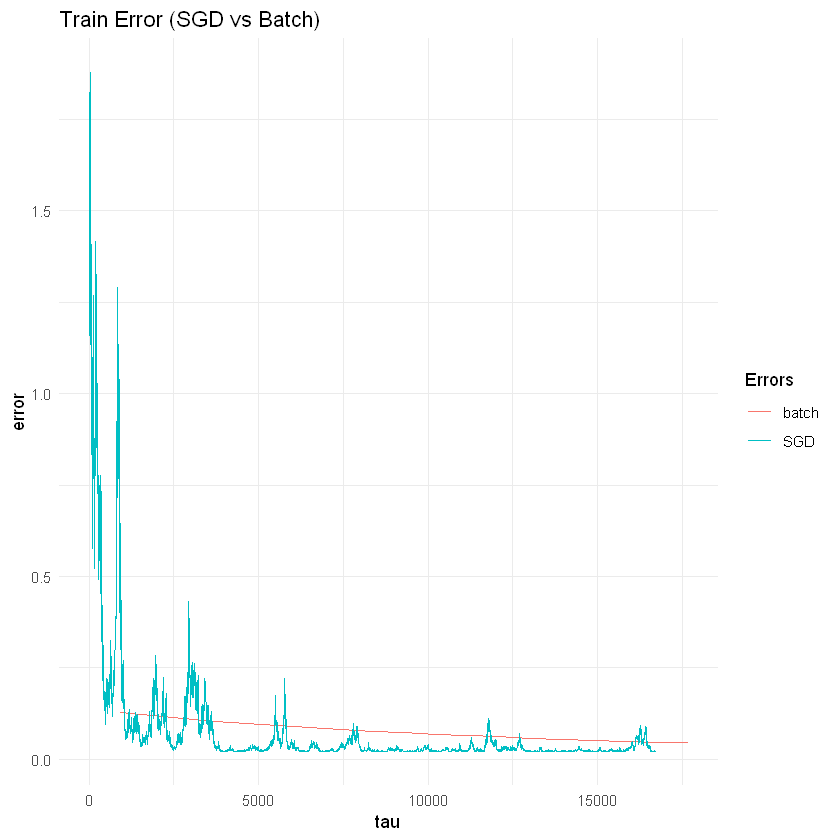

In [7]:
#Plot Comparing training error between SGD and Batch
ggplot(data=sgd_batch, aes(x=tau, y=error, color=algo)) +
    geom_line() + ggtitle('Train Error (SGD vs Batch)') +
    scale_color_discrete(guide = guide_legend(title = 'Errors')) +theme_minimal()
  

Explain	(in	your	Jupyter	Notebook	file)	your	observation	based	on	the	 errors	 plot	 you	 generated	 in	 Part	 c.	 Particularly,	 discuss the convergence	 speed	 and	 the	 fluctuations	 you	 see	 in	 the	 error trends.

Based on the plot result, it seems that the sgd convergence speed is much quicker than the batch convergence speed. The reason for the differences in the convergence might be how sgd visit each data point in each iteration but not the whole dataset, which make the convergence almost near zero faster than batch. However, visiting some of the point might cause a fluctuation in error trend, which might be due to a variation in data point and how complicate the weight vector in each iteration get updated. 

## Reference

All of the code and the algorithm idea is derieved from:

- Chen, B. (2022). $\textit{Week 3.: Linear Models for Regression}$ \[PowerPoint slides]. https://lms.monash.edu/mod/resource/view.php?id=9894969
- Haffari, G. (2016, July). $\textit{CodeBase_A1_Q5 (1).R}$. https://lms.monash.edu/pluginfile.php/14028235/mod_assign/intro/CodeBase_A1_Q5%20%281%29.R
- Haffari, G. (2019, January 9th). $\textit{ Linear Models for Regression}$.
https://lms.monash.edu/mod/resource/view.php?id=10099576
- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 2.1 Linear Regression}$. https://lms.monash.edu/mod/folder/view.php?id=10099584